## [MAFAULDA: Machinery Fault Database](http://www02.smt.ufrj.br/~offshore/mfs/page_01.html)
## Dataset: [Induction Motor Faults dataset](https://www.kaggle.com/uysalserkan/fault-induction-motor-dataset)

## Models: DWT BASED ANN


## Prepare Data

In [67]:
import numpy as np
import pandas as pd
import glob 

In [68]:
cur_path = "/kaggle/input/fault-induction-motor-dataset/imbalance/"

In [69]:
normal_file_names = glob.glob("/kaggle/input/fault-induction-motor-dataset/normal/"+'/normal/*.csv')
imnormal_file_names_6g = glob.glob(cur_path+'/imbalance/6g/*.csv')
imnormal_file_names_10g = glob.glob(cur_path+'/imbalance/10g/*.csv')
imnormal_file_names_15g = glob.glob(cur_path+'/imbalance\\15g/*.csv')
imnormal_file_names_20g = glob.glob(cur_path+'/imbalance\\20g/*.csv')
imnormal_file_names_25g = glob.glob(cur_path+'/imbalance\\25g/*.csv')
imnormal_file_names_30g = glob.glob(cur_path+'/imbalance\\30g/*.csv')

In [70]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [71]:
data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)

In [72]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250000 entries, 0 to 12249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
dtypes: float64(8)
memory usage: 747.7 MB


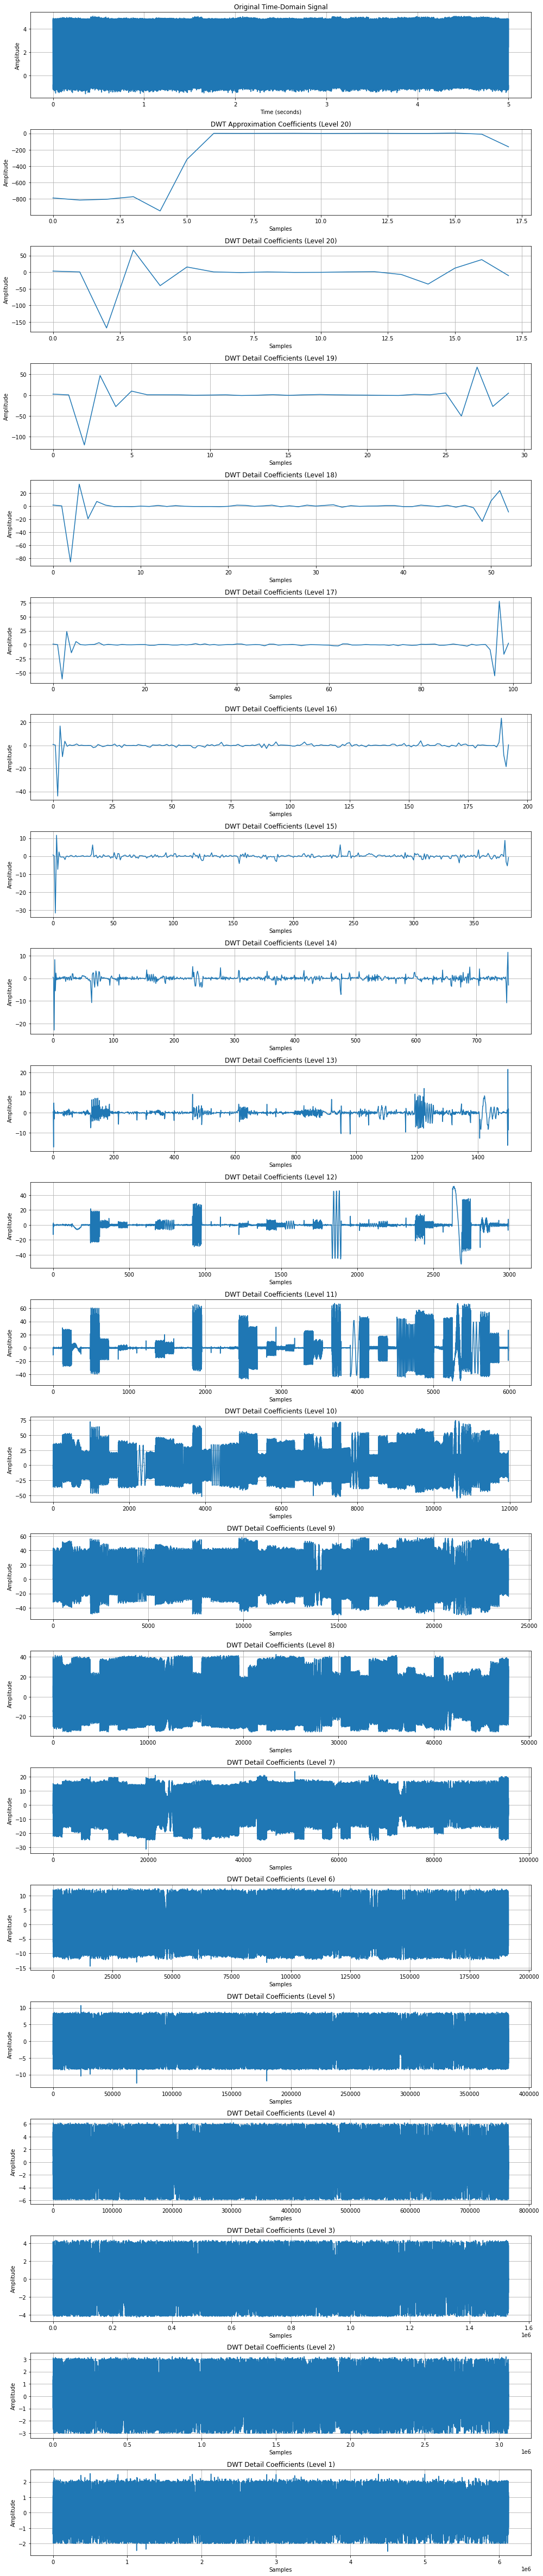

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Your data
signal_data = data_n[0].values
fs = 2450  

# Time axis matching signal_data length
t = np.linspace(0, 5, len(signal_data), endpoint=False)

# Perform DWT
wavelet = 'db4'
coeffs = pywt.wavedec(signal_data, wavelet)
level = len(coeffs) - 1

# Plot
plt.figure(figsize=(14, 3 * (level + 2)))

# Plot the original signal
plt.subplot(level + 2, 1, 1)
plt.plot(t, signal_data)
plt.title('Original Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot DWT coefficients
for i, coeff in enumerate(coeffs):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeff)
    if i == 0:
        plt.title(f'DWT Approximation Coefficients (Level {level})')
    else:
        plt.title(f'DWT Detail Coefficients (Level {level - i + 1})')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.savefig('dwt_output.pdf', format='pdf')  # Save as PDF
plt.show()


#### Down Sampling

In [74]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [75]:
data_n = downSampler(data_n, 0, 5000)
data_6g = downSampler(data_6g, 0, 5000)
data_10g = downSampler(data_10g, 0, 5000)
data_15g = downSampler(data_15g, 0, 5000)
data_20g = downSampler(data_20g, 0, 5000)
data_25g = downSampler(data_25g, 0, 5000)
data_30g = downSampler(data_30g, 0, 5000)

In [76]:
data_n

,0,1,2,3,4,5,6,7
0,0.068100,0.011065,0.017430,0.001620,-0.059850,0.000868,-0.088720,0.010209
1,-0.045139,0.015286,-0.010404,-0.000644,0.426827,0.005168,0.155058,0.013550
2,-0.064635,0.029477,0.002314,0.001339,0.232491,0.005660,0.390845,0.009958
3,0.089400,-0.002910,0.002770,-0.002331,-0.116512,-0.003224,0.219854,0.012501
4,-0.070240,0.008164,-0.012449,0.002579,0.367824,0.008202,0.343822,0.010695
...,...,...,...,...,...,...,...,...
2445,0.014942,0.010274,0.000469,0.002580,0.138325,0.026142,0.336499,0.009176
2446,-0.078864,0.016197,0.001844,-0.000609,0.105457,0.016553,0.583317,0.011419
2447,-0.026635,0.000749,0.000612,0.002510,0.044352,0.010177,0.540934,0.012321
2448,0.016440,-0.018926,-0.010451,-0.003154,-0.053072,-0.011704,0.407358,0.012750


#### DWT Convolve

In [77]:
from scipy import signal
def DWT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [78]:
data_n = DWT(data_n)
data_6g = DWT(data_6g)
data_10g = DWT(data_10g)
data_15g = DWT(data_15g)
data_20g = DWT(data_20g)
data_25g = DWT(data_25g)
data_30g = DWT(data_30g)

In [79]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
14592,2
14593,2
14594,2
14595,2


In [80]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, shuffle=True)

In [82]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (10947, 15)
Shape of Test Data : (3650, 15)


## ANN Deep Learning
### Build Model

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_61 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_62 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 7)                 231       
Total params: 21,511
Trainable params: 21,511
Non-trainable params: 0
_________________________________________________

### Trainining DWT Based ANN for Classification of Faults

In [96]:
hist = model.fit(X_train , y_train , epochs=20, validation_split=0.2)

Epoch 1/20
274/274 [==============================] - 1s 3ms/step - loss: 1.3901 - accuracy: 0.3297 - val_loss: 0.9479 - val_accuracy: 0.5219
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.7583 - accuracy: 0.6424 - val_loss: 0.2079 - val_accuracy: 0.9247
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.1987 - accuracy: 0.9388 - val_loss: 0.0895 - val_accuracy: 0.9753
Epoch 4/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9657 - val_loss: 0.0590 - val_accuracy: 0.9772
Epoch 5/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9774 - val_loss: 0.0809 - val_accuracy: 0.9689
Epoch 6/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0489 - accuracy: 0.9816 - val_loss: 0.0496 - val_accuracy: 0.9785
Epoch 7/20
274/274 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9705 - val_loss: 0.0998 - val_accuracy: 0.9689
Epoch 

### plot training history

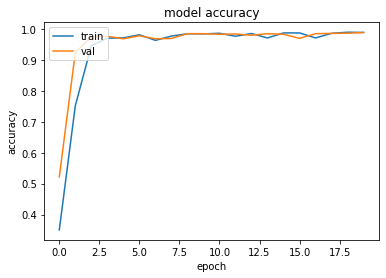

In [97]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("accuracy_plot.png", dpi=500, bbox_inches='tight')
plt.show()

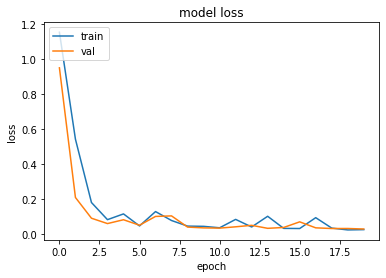

In [98]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("loss_plot.png", dpi=500, bbox_inches='tight')
plt.show()

In [99]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

115/115 - 0s - loss: 0.0234 - accuracy: 0.9910


In [100]:
import pandas as pd

# Predict the labels on the test set
y_pred = model.predict(X_test)

In [101]:
y_pred[0]

array([3.4224132e-09, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [103]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [104]:
y_pred_classes

array([2, 1, 1, ..., 1, 2, 0])

In [105]:
label_mapping = {0: 'normal', 1: 'fault', 2: 'misalignment'}

# Converting true labels and predicted labels to class names
y_test_names = [label_mapping[label.item()] for label in np.asarray(y_test)]
y_pred_names = [label_mapping[label] for label in y_pred_classes]

# Creating a DataFrame with the true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': y_test_names,      # true labels mapped to class names
    'Predicted Label': y_pred_names  # predicted labels mapped to class names
})

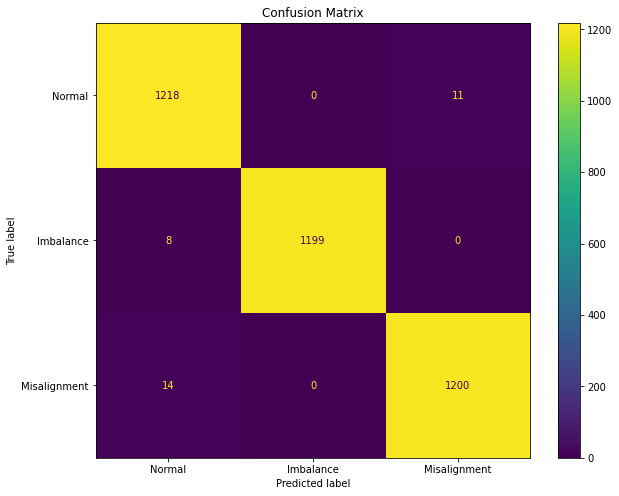

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

true_labels = y_test
predicted_labels = y_pred_classes  # DNN predictions

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Imbalance', 'Misalignment'])
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='viridis', values_format='d', ax=ax, xticks_rotation='horizontal')
ax.set_title('Confusion Matrix')

# Save the figure
fig.savefig("Confusion_Matrix.png", dpi=1000, bbox_inches='tight')


## BINARY Fault Classification

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("accuracy_plot.png", dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("loss_plot.png", dpi=500, bbox_inches='tight')
plt.show()